# 简单线性回归

简单的来说,假设目标 $y(t)$ 和特征 $x(t) =[x_1 (t),x_2(t),\dots,x_k(t)]^T $, 从最简单的线性回归模型出发
 $$ y(t) = b + k_1 x_1 (t) + k_2 x_2 (t)+\dots + k_k x_k (t) $$ 
原模型可以表示为：
$$y(t)= \bar{x}^T(t)A$$
其中，$\theta = [b,k_1,k_2,\dots ,k_k]^T,\bar{x}(t)$ 为向量, $\bar{x}(t) = [1,x(t)]$ 表示特征的扩展,包含了常数项,$y(t)$为t时刻的观测值，可以是标量也可以是向量，对于多组数据，我们可以将其堆叠，写作：
$$Y = X \theta$$
$Y= [y(1),y(2),\dots,y(n)]^T , X = [\bar{x}(1),\bar{x}(2),\dots,\bar{x}(n)]^T$，n为样本的量，如果X满秩，即特征之间没有线性相关，即可通过最小二乘来解决此问题，获得参数 A，对应每一项特征的系数。

## 最小二乘求结果
最小二乘的目标函数为：
$min{\sum_{t=1}^{n}{(\hat{y}(t) - y(t))^2}}$
带入参数展开后，即可得到：
$$\theta = (X^TX)^{-1}X^TY$$


In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 目标函数
def real_func(x):
    return 1.5*x + 0.2

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [23]:
# 二十个点
x = np.linspace(0, 1, 35)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [1.45768737 0.23944983]


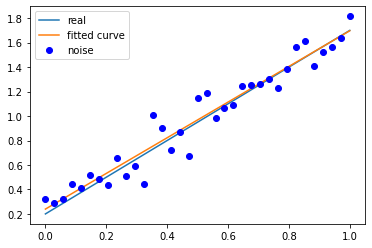

In [24]:
# M=0
p_lsq_0 = fitting(M=1)

可以看到最小二乘的输出结果为 [1.45768737 0.23944983 非常接近真实的 [1.5  0.2 ]

接下来我们采用 sklean 自带的线性回归的库来查看结果

In [25]:
from sklearn.linear_model import LinearRegression # 导入线性回归模型
model = LinearRegression() # 定义模型
model.fit(x[:,np.newaxis], y) # 训练模型
print("输出参数w：",model.coef_) # 输出模型参数w
print("输出参数b：",model.intercept_) # 输出参数b

输出参数w： [1.45768737]
输出参数b： 0.2394498318091477


可见，Sklearn 中所得的算法结果和我们所用的leastsquare所得出的结果一致, 下面对算法的结果进行测试

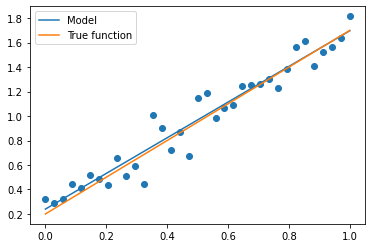

In [26]:
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Model")   # np.newaxis的功能:插入新维度
plt.plot(X_test, real_func(X_test), label="True function")
plt.scatter(x,y) # 画出训练集的点
plt.legend(loc="best")
plt.show()

可看出，拟合的效果还是不错的，但是比如房价数据中，房价和面积的平方会成正比，
# 多项式回归
核心是增加x的多次项特征，通过线性回归找出对应的系数来，本质上还是线性回归，引用课程中的代码,这里比较有趣的是pipeline的使用

在sklearn中，所谓pipeline，就是由一系列数据转换步骤或待拟合模型（如果有，则模型必须处于管道末端）构成的加工链条。



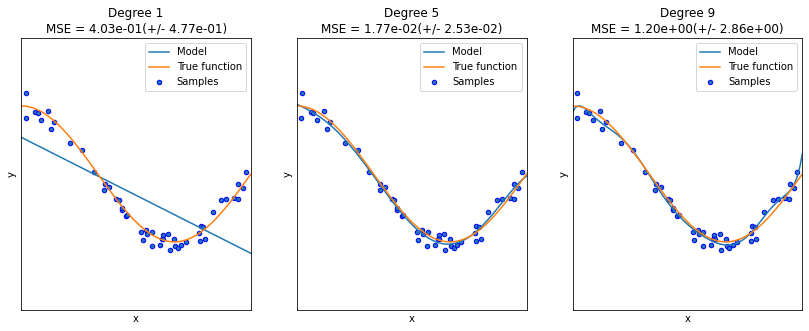

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # 导入能够计算多项式特征的类
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X): # 这是我们设定的真实函数，即ground truth的模型
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)  # 设置随机种子
n_samples = 50

X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

degrees = [1,5, 9] # 多项式最高次
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)]) # 使用pipline串联模型
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,scoring="neg_mean_squared_error", cv=10) # 使用交叉验证
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

sss